In [23]:
import pandas as pd
from lifelines.utils import to_long_format

base_df = pd.DataFrame([
  {'id': 1, 'duration': 10, 'event': True, 'var1': 0.1},
  {'id': 2, 'duration': 12, 'event': True, 'var1': 0.5}
])

base_df = to_long_format(base_df, duration_col="duration")

In [24]:
base_df = df[['id', 'start', 'stop', 'var1', 'event']]
base_df

id  start  stop  var1  event
0   1      0   4.0   0.1  False
1   1      4   8.0   0.1  False
2   1      8  10.0   0.1   True
3   2      0  12.0   0.5   True

In [25]:
from lifelines.utils import add_covariate_to_timeline

cv = pd.DataFrame([
  {'id': 1, 'time': 0, 'var2': 1.4},
  {'id': 1, 'time': 4, 'var2': 1.2},
  {'id': 1, 'time': 8, 'var2': 1.5},
  {'id': 2, 'time': 0, 'var2': 1.6},

])

df = add_covariate_to_timeline(base_df, cv, duration_col="time", id_col="id", event_col="event")

In [26]:
df = df[['start', 'stop', 'var1', 'var2', 'id', 'event']]
df

start  stop  var1  var2  id  event
0      0   4.0   0.1   1.4   1  False
1      4   8.0   0.1   1.2   1  False
2      8  10.0   0.1   1.5   1   True
3      0  12.0   0.5   1.6   2   True

C:\Python312\Lib\site-packages\lifelines\utils\__init__.py:1120: ConvergenceWarning: Column var1 have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['event'].astype(bool)
>>> print(df.loc[events, 'var1'].var())
>>> print(df.loc[~events, 'var1'].var())

A very low variance means that the column var1 completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


Iteration 1: norm_delta = 6.79e-01, step_size = 0.9500, log_lik = -0.69315, newton_decrement = 3.57e-01, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.25e-01, step_size = 0.9500, log_lik = -0.32113, newton_decrement = 9.06e-03, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.27e-02, step_size = 0.9500, log_lik = -0.31185, newton_decrement = 8.61e-05, seconds_since_start = 0.0
Iteration 4: norm_delta = 7.41e-04, step_size = 1.0000, log_lik = -0.31177, newton_decrement = 2.60e-07, seconds_since_start = 0.0
Iteration 5: norm_delta = 2.13e-07, step_size = 1.0000, log_lik = -0.31177, newton_decrement = 2.16e-14, seconds_since_start = 0.1
Convergence completed after 5 iterations.


<lifelines.CoxTimeVaryingFitter: fitted with 4 periods, 2 subjects, 2 events>
         event col = 'event'
         penalizer = 0.1
number of subjects = 2
 number of periods = 4
  number of events = 2
partial log-likelihood = -0.31
  time fit was run = 2024-09-21 16:09:37 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
var1      -4.08      0.02      5.14          -14.16            5.99                0.00              398.74

           cmp to     z    p  -log2(p)
covariate                             
var1         0.00 -0.79 0.43      1.23
---
Partial AIC = 2.62
log-likelihood ratio test = 0.76 on 1 df
-log2(p) of ll-ratio test = 1.39

<Axes: xlabel='log(HR) (95% CI)'>

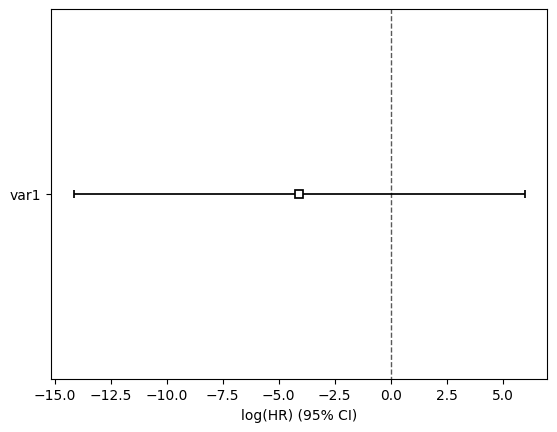

In [27]:
from lifelines import CoxTimeVaryingFitter

ctv = CoxTimeVaryingFitter(penalizer=0.1)
ctv.fit(base_df, id_col="id", event_col="event", start_col="start", stop_col="stop", show_progress=True)
ctv.print_summary()
ctv.plot()